In [62]:
import gzip
import sklearn
from sklearn import linear_model
from collections import defaultdict
import random
import math
import numpy as np

import string
import nltk
from nltk.stem.porter import *
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from scipy.sparse import lil_matrix

In [63]:
def parse(f):
    for l in gzip.open(f):
        yield eval(l)

In [64]:
def readJSON(path):
  for l in gzip.open(path, 'rt'):
    d = eval(l)
    u = d['userID']
    try:
      g = d['gameID']
    except Exception as e:
      g = None
    yield u,g,d

In [65]:
train_json = list(parse("data/train.json.gz"))

In [5]:
train_cat_json = list(parse("data/train_Category.json.gz"))

In [48]:
train_json[1]

{'userID': 'u88836191',
 'early_access': False,
 'hours': 63.5,
 'hours_transformed': 6.011227255423254,
 'found_funny': 1,
 'text': 'If you want to sit in queue for 10-20min and have 140 ping then this game is perfect for you :)',
 'gameID': 'b19457938',
 'user_id': '76561198030408772',
 'date': '2017-05-20'}

In [73]:
len(train_json)

175000

In [7]:
train_cat_json[0]

{'userID': 'u74382925',
 'genre': 'Adventure',
 'early_access': False,
 'reviewID': 'r75487422',
 'hours': 4.1,
 'text': 'Short Review:\nA good starting chapter for this series, despite the main character being annoying (for now) and a short length. The story is good and actually gets more interesting. Worth the try.\nLong Review:\nBlackwell Legacy is the first on the series of (supposedly) 5 games that talks about the main protagonist, Rosangela Blackwell, as being a so called Medium, and in this first chapter we get to know how her story will start and how she will meet her adventure companion Joey...and really, that\'s really all for for now and that\'s not a bad thing, because in a way this game wants to show how hard her new job is, and that she cannot escape her destiny as a medium.\nMy biggest complain for this chapter, except the short length, it\'s the main protagonist being a "bit" too annoying to be likeable, and most of her dialogues will always be about complaining or just

In [67]:
train_users = set()
train_cat_users = set()

for d in train_json:
    train_users.add(d['userID'])
# for d in train_cat_json:
#     train_cat_users.add(d['userID'])

In [25]:
len(train_users)
len(train_cat_users)

6712

In [27]:
both = train_cat_users.intersection(train_users)

In [68]:
# data = [[d['userID'],d['gameID'],1] for d in train_json]

split = 165000
play_train = train_json[:split]
ug_train = [[d['userID'],d['gameID'],1] for d in play_train]
validation_play = train_json[split:]
ug_valid = [[d['userID'],d['gameID']] for d in validation_play]

# cat_data = [[d['genreID'],d['userID'],d['text']] for d in train_cat_json]

split = 165000

# cat_train = train_cat_json[:split]
# Xtrain_cat = [[d['text']] for d in cat_train]
# ytrain_cat = [[d['genreID']] for d in cat_train]

# cat_valid= train_cat_json[split:]
# Xvalid_cat = [[d['text']] for d in cat_validation]
# yvalid_cat = [d['genreID'] for d in cat_validation]

In [69]:
usersPerGame = defaultdict(set)
gamesPerUser = defaultdict(set)
#collects all unique games in the dataset
uniqueGames = set()
data = [[d['userID'],d['gameID'],1] for d in train_json]

for d in data:
    u, g = d[0], d[1]
    usersPerGame[g].add(u)
    gamesPerUser[u].add(g)
    uniqueGames.add(g)

ug_valid = [[d['userID'],d['gameID'],1] for d in validation_play]
users_valid = [d[0] for d in ug_valid]
ug_valid_neg= []
for u in users_valid:
    gamesNotPlayed = uniqueGames - gamesPerUser[u]
    randomGame = random.choice(list(gamesNotPlayed))
    ug_valid_neg.append([u, randomGame,0])

ug_valid_build = ug_valid + ug_valid_neg

In [9]:
yvalid = [d[2] for d in ug_valid_build]

In [72]:
ug_valid_build[15000]

['u06060513', 'b44943712', 0]

In [132]:
train_users = set()
train_cat_users = set()

for d in train_play:
    train_users.add(d['userID'])
for d in cat_train:
    train_cat_users.add(d['userID'])
    

In [133]:
both = train_users.intersection(train_cat_users)

In [204]:
userCatID = defaultdict(list)
userCat = defaultdict(list)
gameGenreID = defaultdict(int)
gameGenre = defaultdict(list)
#all genres that user played
usersPerGenre = defaultdict(set)
genresPerUser = defaultdict(set)
userGenre = defaultdict(int)
for d in cat_train:
    user, genre, genreID = d['userID'], d['genre'], d['genreID']
    #all genres that a user in cat training setplayed
    usersPerGenre[genreID].add(user)
    genresPerUser[user].add(genreID)
    userGenre[user] = genreID
    
   
    
usersPerGame = defaultdict(set)
gamesPerUser = defaultdict(set)
for d in play_train:
    user, game = d['userID'],d['gameID']
    usersPerGame[game].add(user)
    gamesPerUser[user].add(game)


gameCat = defaultdict(int)
for d in play_train:
    user, game = d['userID'],d['gameID']
    genresUserPlayed = genresPerUser[user]
    break
    
    
    
    

In [142]:
import matplotlib.pyplot as plt

In [118]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

In [221]:
#for some user game pair
    # find all the genres that that user played
    #then for all users' that played game except for user
        #find all genred that user' played
def similarityScores_genre(user, genre):
    #consider g' in training set that a user has played
#     g_primes = gamesPerUser[user]
    g_primes = genresPerUser[user]
    similarities = []
    
    if len(g_primes) == 0:
        similarities.append(0)
        return similarities
    
    for g_prime in g_primes:
        if g_prime == genre:
            continue
        #users in training data who have played g
        ugTrain = usersPerGenre[genre]
        #users who have played g'
        ugPrime = usersPerGenre[g_prime]
    
        if len(ugPrime) == 0:
            similarities.append(0)
        if len(ugTrain) == 0:
            similarities.append(0)
        else:
            similarities.append(Jaccard(ugTrain,ugPrime))
    
        
        
    similarities.sort(reverse= True)
    
    return similarities[:10]

In [160]:
def similarityScores(user, game):
    #consider g' in training set that a user has played
    g_primes = gamesPerUser[user]
    similarities = []
    
    if len(g_primes) == 0:
        similarities.append(0)
        return similarities
    
    for g_prime in g_primes:
        if g_prime == game:
            continue
        #users in training data who have played g
        ugTrain = usersPerGame[game]
        #users who have played g'
        ugPrime = usersPerGame[g_prime]
        if len(ugPrime) == 0:
            similarities.append(0)
        if len(ugTrain) == 0:
            similarities.append(0)
        else:
            similarities.append(Jaccard(ugTrain,ugPrime))
    
        
        
    similarities.sort(reverse= True)
    
    return similarities[:10]

(array([5.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0600e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4000e+01, 1.9524e+04]),
 array([0.        , 0.08862891, 0.17725782, 0.26588674, 0.35451565,
        0.44314456, 0.53177347, 0.62040238, 0.7090313 , 0.79766021,
        0.88628912]),
 <a list of 10 Patch objects>)

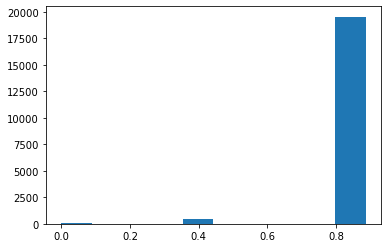

In [223]:
plt.hist(max_genre_scores)

In [222]:
max_genre_scores = []
for u,g,_ in ug_valid_build:
    genre = userGenre[u]
    score = similarityScores_genre(u, genre)
    if len(score) == 0:
        max_genre_scores.append(0)
    else:
        max_genre_scores.append(max(score))

In [192]:
def jaccard_preds(max_scores,th):
    predictions = []
    for sim in max_scores:
        if sim > th:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [193]:
def computeAccuracy(preds, true):  
    correct = np.array(preds) == np.array(true)
    return sum(correct) / len(correct)

In [224]:
def bestThreshold():
    best_th = 0
    best_acc = 0
    for th in np.arange(0,.9,.05):
        preds = jaccard_preds(max_genre_scores,th)
        acc = computeAccuracy(preds, yvalid)
        if acc > best_acc:
            best_th = th
            best_acc = acc
            
    return (best_th, best_acc)
best_jacc = bestThreshold()

In [225]:
best_jacc

(0.0, 0.5)

In [162]:
def baselinePreds4(ug_valid_build, j_th,pop_th):
    gameCount = defaultdict(int)
    totalPlayed = 0

    usersPerGame = defaultdict(set)
    gamesPerUser = defaultdict(set)

    
    for user,game,_ in readJSON("data/train.json.gz"):
        gameCount[game] += 1
        totalPlayed += 1
        usersPerGame[g].add(u)
        gamesPerUser[u].add(g)

    mostPopular = [(gameCount[x], x) for x in gameCount]
    mostPopular.sort()
    mostPopular.reverse()

    return1 = set()
    count = 0
    for ic, i in mostPopular:
        count += ic
        return1.add(i)
        if count > totalPlayed/pop_th: break

            
    predictions_and = []
    for user, game, _ in ug_valid_build:
        mostSim = similarityScores(user, game)
        mostSimG = similarityScores_genre(user, game)
        if (game in return1):
            predictions_and.append(1)
        elif game in gamesPerUser[user]:
            predictions_and.append(1)
        elif :# user played certain genres, and that game was played by users who also played certain genres
            predictions_and.append(0)
        else:
            if (game not in return1) and (max(mostSim) >= j_th):
                predictions_and.append(1)
            else:
                predictions_and.append(0)
    return predictions_and

In [164]:
preds_and = baselinePreds4(ug_valid_build,.048,1.52)
and_acc = computeAccuracy(preds_and, yvalid)
print(and_acc)

0.7036


In [1]:
#########
########
#########
########
#########
########
#########
import tensorflow as tf
import array
import gzip
import random
from tensorflow.keras import Model
from collections import defaultdict

In [2]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

In [53]:
ug_valid_build

[['u49969792', 'b25961467', 1],
 ['u33147591', 'b73229067', 1],
 ['u00954406', 'b37068085', 1],
 ['u40416473', 'b85572219', 1],
 ['u08125051', 'b88846011', 1],
 ['u16794935', 'b19939295', 1],
 ['u42345370', 'b31288876', 1],
 ['u40134397', 'b22332890', 1],
 ['u38053603', 'b44539786', 1],
 ['u25257262', 'b64105731', 1],
 ['u04355033', 'b67179888', 1],
 ['u40085824', 'b09213636', 1],
 ['u66137217', 'b72051448', 1],
 ['u60516559', 'b82987255', 1],
 ['u79477484', 'b59467286', 1],
 ['u65083695', 'b36061876', 1],
 ['u70957097', 'b04084075', 1],
 ['u35234877', 'b34733510', 1],
 ['u67210927', 'b40652749', 1],
 ['u71295643', 'b10009358', 1],
 ['u14505832', 'b60633667', 1],
 ['u37899313', 'b08749860', 1],
 ['u24610650', 'b24086450', 1],
 ['u70460581', 'b73525270', 1],
 ['u56233169', 'b07673761', 1],
 ['u25967030', 'b45313277', 1],
 ['u22455223', 'b06690738', 1],
 ['u70829339', 'b26913090', 1],
 ['u38913894', 'b84695943', 1],
 ['u69944776', 'b69475426', 1],
 ['u66482270', 'b80454010', 1],
 ['u6496

In [74]:
userIDs = {}
itemIDs = {}
interactions = []

# Could adapt to any dataset, this one is from
# https://sites.google.com/eng.ucsd.edu/ucsdbookgraph/home
for d in ug_valid_build:
    u = d[0]
    i = d[1]
    p = d[2]
    if not u in userIDs: userIDs[u] = len(userIDs)
    if not i in itemIDs: itemIDs[i] = len(itemIDs)
    interactions.append((u,i,p))
    
for d in ug_valid_build:
    u = d[0]
    i = d[1]
    p = d[2]
    if not u in userIDs: userIDs[u] = len(userIDs)
    if not i in itemIDs: itemIDs[i] = len(itemIDs)
    interactions.append((u,i,p))

In [75]:
len(interactions)

40000

In [76]:
interactions[0]

('u49969792', 'b25961467', 1)

In [77]:
itemsPerUser = defaultdict(set)
for u,i,_ in ug_valid_build:
    itemsPerUser[u].add(i)

In [78]:
items = list(itemIDs.keys())


In [79]:
optimizer = tf.keras.optimizers.Adam(0.001)


In [80]:
class BPRbatch(tf.keras.Model):
    def __init__(self, K, lamb):
        super(BPRbatch, self).__init__()
        # Initialize variables
        self.betaI = tf.Variable(tf.random.normal([len(itemIDs)],stddev=0.001))
        self.gammaU = tf.Variable(tf.random.normal([len(userIDs),K],stddev=0.001))
        self.gammaI = tf.Variable(tf.random.normal([len(itemIDs),K],stddev=0.001))
        # Regularization coefficient
        self.lamb = lamb

    # Prediction for a single instance
    def predict(self, u, i):
        p = self.betaI[i] + tf.tensordot(self.gammaU[u], self.gammaI[i], 1)
        return p

    # Regularizer
    def reg(self):
        return self.lamb * tf.nn.l2_loss(self.betaI) +\
                           tf.nn.l2_loss(self.gammaU) +\
                           tf.nn.l2_loss(self.gammaI)
    
    def score(self, sampleU, sampleI):
        u = tf.convert_to_tensor(sampleU, dtype=tf.int32)
        i = tf.convert_to_tensor(sampleI, dtype=tf.int32)
        beta_i = tf.nn.embedding_lookup(self.betaI, i)
        gamma_u = tf.nn.embedding_lookup(self.gammaU, u)
        gamma_i = tf.nn.embedding_lookup(self.gammaI, i)
        x_ui = beta_i + tf.reduce_sum(tf.multiply(gamma_u, gamma_i), 1)
        return x_ui

    def call(self, sampleU, sampleI, sampleJ):
        x_ui = self.score(sampleU, sampleI)
        x_uj = self.score(sampleU, sampleJ)
        return -tf.reduce_mean(tf.math.log(tf.math.sigmoid(x_ui - x_uj)))

model = BPRbatch(5, 0.00001)


In [81]:
def trainingStep(interactions):
    Nsamples = 50000
    with tf.GradientTape() as tape:
        sampleU, sampleI, sampleJ = [], [], []
        for _ in range(Nsamples):
            u,i,_ = random.choice(interactions) # positive sample
            j = random.choice(items) # negative sample
            while j in itemsPerUser[u]:
                j = random.choice(items)
            sampleU.append(userIDs[u])
            sampleI.append(itemIDs[i])
            sampleJ.append(itemIDs[j])

        loss = model(sampleU,sampleI,sampleJ)
        loss += model.reg()
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients((grad, var) for
                              (grad, var) in zip(gradients, model.trainable_variables)
                              if grad is not None)
    return loss.numpy()

In [82]:
# Run training iterations (probably want more than 10...)
for i in range(10):
    obj = trainingStep(interactions)
    print("iteration " + str(i) + ", objective = " + str(obj))

iteration 0, objective = 0.7112138
iteration 1, objective = 0.69979113
iteration 2, objective = 0.696675
iteration 3, objective = 0.6980769
iteration 4, objective = 0.698981
iteration 5, objective = 0.69736
iteration 6, objective = 0.6952338
iteration 7, objective = 0.6942483
iteration 8, objective = 0.6942944
iteration 9, objective = 0.6940605


In [84]:
interactions[1]

('u33147591', 'b73229067', 1)

In [85]:
model.predict(userIDs['u33147591'], itemIDs['b73229067']).numpy()


0.00874547

In [ ]:
########
########
########
########
########
########
########
########
########
########
########
########
########
########


In [13]:
split = 165000
cat_train = train_cat_json[:split]
userCatID = defaultdict(list)
userCat = defaultdict(list)
itemCatID = defaultdict(int)
itemCate = defaultdict(list)

for d in cat_train:
    user,genre,genreID = d['userID'], d['genre'], d['genreID']

In [ ]:
cat_data = [[d['genreID'],d['userID'],d['text']] for d in train_cat_json]

split = 165000

cat_train = train_cat_json[:split]
Xtrain_cat = [[d['text']] for d in cat_train]
ytrain_cat = [[d['genreID']] for d in cat_train]

cat_validation = train_cat_json[split:]
Xvalid_cat = [[d['text']] for d in cat_validation]
yvalid_cat = [d['genreID'] for d in cat_validation]

In [28]:
usersPerGame = defaultdict(set)
gamesPerUser = defaultdict(set)
#collects all unique games in the dataset
uniqueGames = set()

for d in data:
    u, g = d[0], d[1]
    usersPerGame[g].add(u)
    gamesPerUser[u].add(g)
    uniqueGames.add(g)
    
users_train = [d[0] for d in ug_train]

ug_train_neg= []
for u in users_train:
    gamesNotPlayed = uniqueGames - gamesPerUser[u]
    randomGame = random.choice(list(gamesNotPlayed))
    ug_train_neg.append([u, randomGame,0])

In [29]:
ug_train_build = ug_train + ug_train_neg

[['u72269489', 'b13788159', 1],
 ['u44767493', 'b39177271', 1],
 ['u12959493', 'b96405832', 1],
 ['u84177817', 'b88846011', 1],
 ['u20522739', 'b76842421', 1],
 ['u01561183', 'b35758555', 0],
 ['u88836191', 'b06394924', 0],
 ['u36851597', 'b54626275', 0],
 ['u95996244', 'b35999117', 0],
 ['u50608961', 'b88158276', 0]]

In [30]:
for d in ug_train_build:
    print(d)
    break

['u01561183', 'b96045472', 1]


In [23]:
ug_train_build[0]

['u01561183', 'b96045472']

In [34]:
usersPerGame = defaultdict(set)
gamesPerUser = defaultdict(set)
for u,g,_ in ug_train:
    usersPerGame[g].add(u)
    gamesPerUser[u].add(g)
    

In [40]:
U_Jsims_train = []
B_Jsims_train = []


U_Jsims_valid = []
B_Jsims_valid = []


for d in ug_train_build:
    U_Jsims_train.append(jsim_mostSimilar_users(d[1],d[0]))
    B_Jsims_train.append(jsim_mostSimilar_items(d[0],d[1]))

# for u,b in ug_train_build:
#     U_Jsims_valid.append(jsim_mostSimilar_users(d[1],d[0]))
#     B_Jsims_valid.append(jsim_mostSimilar_items(d[0],d[1]))


In [42]:
for d in ug_train_build:
    U_Jsims_valid.append(jsim_mostSimilar_users(d[1],d[0]))
    B_Jsims_valid.append(jsim_mostSimilar_items(d[0],d[1]))

In [24]:
book_Readers_train = usersPerGame
user_Books_train = gamesPerUser
def list_pad(l, n):
    # if len(l) > n, the method truncates the list l to length n 
    # if n > len(l), the method pads list l with zero up to length n 
    return l[:n] + [0]*(n-len(l))

# """
# Jaccard Similarity
# """

def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

# """
# When evaluating whether a reader will read a certain book, we can approach it in two ways:
# (1) Is the book similar to all the other books the reader has read?
# (2) Is the reader similar to all the other readers who have read the same book?
# """

def items_jsim(book1, book2):
    # generate readers set for the 2 books based on train dataset
    s1 = book_Readers_train[book1]
    s2 = book_Readers_train[book2]
    return Jaccard(s1, s2)

def users_jsim(reader1, reader2):
    # generate Books set for the 2 readers based on train dataset
    s1 = user_Books_train[reader1]
    s2 = user_Books_train[reader2]
    return Jaccard(s1, s2)

def jsim_mostSimilar_items(r,b):
    # Find books read by reader r that are most similar to book b
    # and return Jaccard(b, book) in descending order
    jsims = []
    
    # Go through the books read by reader r
    for other_book in user_Books_train[r]:
        if b == other_book: 
            continue   # skip if the book is b
        jsim = items_jsim(b, other_book)
        jsims.append(jsim)
       
    jsims.sort(reverse=True)  # sort in descending order of Jaccard Similarity
    return jsims[:10]

def jsim_mostSimilar_users(b,r):
    # Find readers who read book b that are most similar to the reader r
    # and return Jaccard(r, reader) in descending order
    jsims = []
    
    # Go through the readers who read book b
    for reader in book_Readers_train[b]:
        if r == reader: 
            continue   # skip if the reader is r
        jsim = users_jsim(r, reader)
        jsims.append(jsim)
       
    jsims.sort(reverse=True)  # sort in descending order of Jaccard Similarity
    return jsims[:10]


def user_jaccard_predict(user, book, threshold):
    
    user_jsims = jsim_mostSimilar_users(book,user)
    if len(user_jsims) == 0:
        max_jsim = 0
    else:
        max_jsim = user_jsims[0]
        
    if max_jsim > threshold:
        predict = True
    else:
        predict = False
    return predict, max_jsim

def book_jaccard_predict(user, book, threshold):
    
    book_jsims = jsim_mostSimilar_items(user,book)
    if len(book_jsims) == 0:
        max_jsim = 0
    else:
        max_jsim = book_jsims[0]
        
    if max_jsim > threshold:
        predict = True
    else:
        predict = False
    return predict, max_jsim

In [ ]:
gameCount = defaultdict(int)
totalPlayed = 0
userCount = defaultdict(int)

for user,game,_ in readJSON("data/train.json.gz"):
    gameCount[game] += 1
    totalPlayed += 1
    userCount[user] +=1



In [ ]:
Xtrain_full = [[d[0], d[1]] for d in ug_train_build]
ytrain_full  [d[2] for d in ug_train_build]

In [ ]:
Xtrain_full[0]


In [ ]:

X_train = []
X_valid = []

for (u,b),user_jsims,book_jsims,in zip(Xtrain_full, U_Jsims_train, B_Jsims_train):
    
    X_train.append([1, gameCount[b]/totalRead, userCount[u]/totalRead,
                    user_jsims[0],user_jsims[1],user_jsims[2],user_jsims[3],user_jsims[4], \
                    book_jsims[0],book_jsims[1], \
                   ])
y_train = ytrain_full

for (u,b),user_jsims,book_jsims in zip(Xvalid_full, U_Jsims_valid, B_Jsims_valid):
    
    X_valid.append([1, gameCount[b]/totalRead, userCount[u]/totalRead,
                    user_jsims[0],user_jsims[1],user_jsims[2],user_jsims[3],user_jsims[4], \
                    book_jsims[0],book_jsims[1], \
                   ])
y_valid = yvalid_full

In [ ]:
model = LogisticRegression(max_iter = 1000, C=lamb, class_weight='balanced',solver='liblinear')
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
valid_pred = model.predict(X_valid)

print("Training:")
computeAccuracy(train_pred,y_train)

print("Validation:")
computeAccuracy(valid_pred,y_valid)